# Evaluate model calibration using folktexts

**Prerequisite**: Install `folktexts` package with optional model API dependencies: `pip install 'folktexts[apis]'`

**Summary**: The script demonstrates how to use folktexts to get insights into model calibration on a **model hosted through a web API**.

### 1. Check folktexts is installed

In [1]:
import folktexts
print(f"{folktexts.__version__=}")

folktexts.__version__='0.0.21'


### 2. Load model API using `litellm`

We use OpenAI's _**GPT-4o-mini**_ model for this demo. The workflow can be similarly applied to any compatible model.

**Note:** _Set_ `model_name` to the model's name. See the `litellm` [list of compatible web-API providers and models](https://docs.litellm.ai/docs/providers/openai#openai-chat-completion-models).

In [2]:
model_name = "openai/gpt-4o-mini"

### 3. Set `OPENAI_API_KEY` (or key to respective API provider)

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "your-key-here"  # NOTE: Substitute with your key here!

### 3. Create default benchmarking tasks

We generate ACSIncome benchmark using folktexts. 

**NOTE:** We will subsample the reference data for faster runtime. This should be removed for obtaining reproducible reslts.


### Benchmark configuration
- The `subsampling` and `numeric_risk_prompting` key-word arguments are examples of optional benchmark configurations. See this [page for a list of available configs](https://github.com/socialfoundations/folktexts?tab=readme-ov-file#benchmark-options).

In [4]:
%%time
from folktexts.benchmark import Benchmark, BenchmarkConfig

# Note: This argument is optional. Omit, or set to 1 for reproducible benchmarking on the full data
subsampling_ratio = 0.005

bench = Benchmark.make_acs_benchmark(
    model=model_name,
    task_name="ACSIncome",
    subsampling=subsampling_ratio,
    numeric_risk_prompting=True,
)

Loading ACS data...
Using zero-shot prompting.
CPU times: user 52.6 s, sys: 1min 23s, total: 2min 16s
Wall time: 2min 21s


### 4. Run benchmark

Results will be saved in a folder RESULTS_DIR. There is 
* `.json` file contains evaluated metrics
* `.cvs` file contains risk scores of each datapoint
* folder called `imgs/` contains figures

In [5]:
RESULTS_DIR = "res"
bench.run(results_root_dir=RESULTS_DIR)

Computing risk estimates:   0%|          | 0/52 [00:00<?, ?it/s]

{'threshold': 0.5,
 'n_samples': 832,
 'n_positives': 305,
 'n_negatives': 527,
 'model_name': 'openai/gpt-4o-mini',
 'accuracy': 0.7884615384615384,
 'tpr': 0.6885245901639344,
 'fnr': 0.3114754098360656,
 'fpr': 0.15370018975332067,
 'tnr': 0.8462998102466793,
 'balanced_accuracy': 0.7674122002053069,
 'precision': 0.7216494845360825,
 'ppr': 0.34975961538461536,
 'log_loss': 0.8249689807687466,
 'brier_score_loss': np.float64(0.15596153846153846),
 'tpr_ratio': 0.0,
 'tpr_diff': 0.782608695652174,
 'precision_ratio': 0.0,
 'precision_diff': 0.9,
 'tnr_ratio': 0.8177339901477833,
 'tnr_diff': 0.18226600985221675,
 'fnr_ratio': 0.21739130434782608,
 'fnr_diff': 0.782608695652174,
 'ppr_ratio': 0.0,
 'ppr_diff': 0.47619047619047616,
 'accuracy_ratio': 0.7,
 'accuracy_diff': 0.30000000000000004,
 'balanced_accuracy_ratio': 0.5961800818553888,
 'balanced_accuracy_diff': 0.33867276887871856,
 'fpr_ratio': 0.0,
 'fpr_diff': 0.18226600985221675,
 'equalized_odds_ratio': 0.0,
 'equalized_odd

### 4. Visualize results

We can also visualize the results inline:

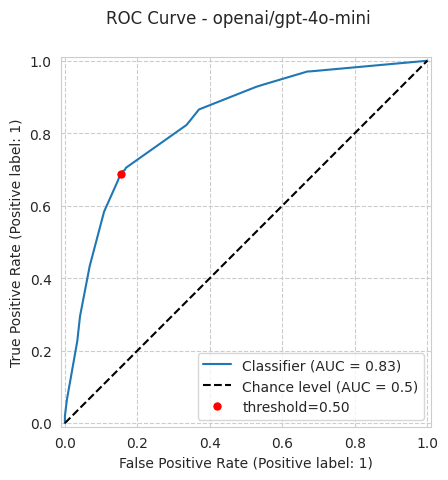

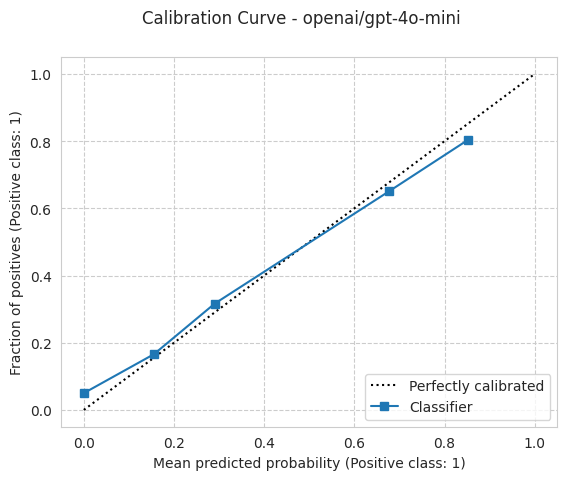

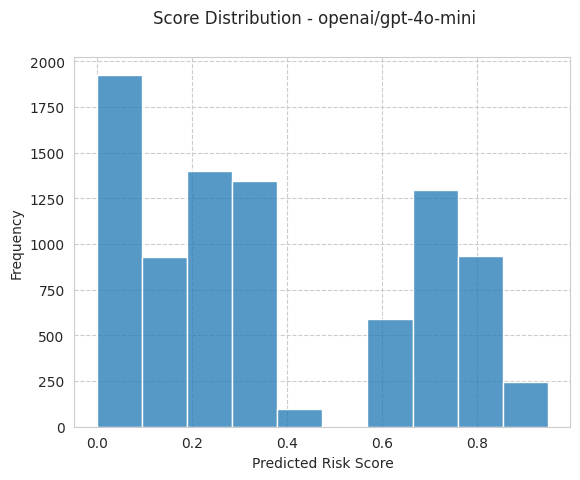

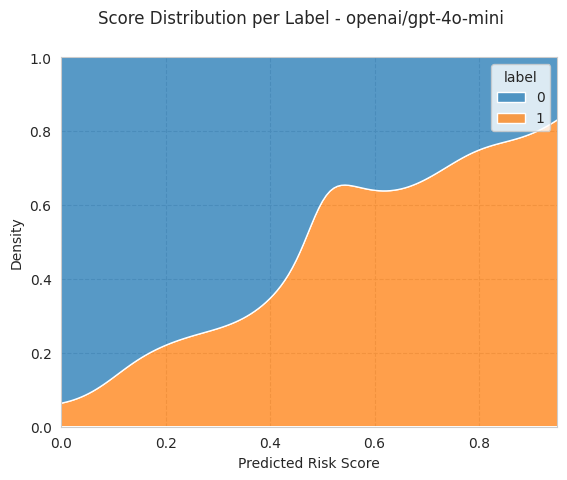

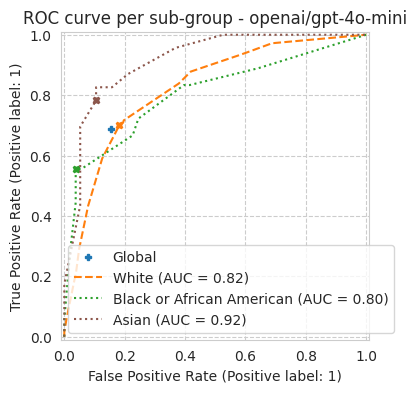

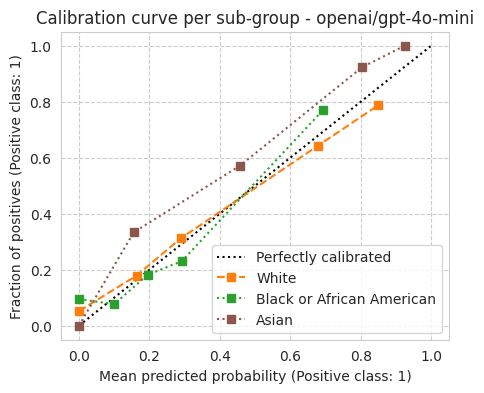

{'roc_curve_path': '/lustre/home/acruz/folktexts/notebooks/res/openai/gpt-4o-mini_bench-551234521/imgs/roc_curve.pdf',
 'calibration_curve_path': '/lustre/home/acruz/folktexts/notebooks/res/openai/gpt-4o-mini_bench-551234521/imgs/calibration_curve.pdf',
 'score_distribution_path': '/lustre/home/acruz/folktexts/notebooks/res/openai/gpt-4o-mini_bench-551234521/imgs/score_distribution.pdf',
 'score_distribution_per_label_path': '/lustre/home/acruz/folktexts/notebooks/res/openai/gpt-4o-mini_bench-551234521/imgs/score_distribution_per_label.pdf',
 'roc_curve_per_subgroup_path': '/lustre/home/acruz/folktexts/notebooks/res/openai/gpt-4o-mini_bench-551234521/imgs/roc_curve_per_subgroup.pdf',
 'calibration_curve_per_subgroup_path': '/lustre/home/acruz/folktexts/notebooks/res/openai/gpt-4o-mini_bench-551234521/imgs/calibration_curve_per_subgroup.pdf'}

In [6]:
bench.plot_results()

---